In [ ]:
! pip -q install optax

In [ ]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import random

%config InlineBackend.figure_format='retina'

In [ ]:
! git init .
! git remote add origin https://github.com/VLSF/SNO
! git pull origin main

In [ ]:
from functions import utils, Chebyshev, Fourier
from datasets import Elliptic

# 1D

Dataset on Chebyshev grid.

In [ ]:
N_points = 100
periodic = False
data = Elliptic.Fourier_series(5, N_points, 5, key=random.PRNGKey(12), generate_rhs=True, periodic=periodic, return_coefficients=False)
if periodic:
  x = jnp.hstack([utils.grid(N_points, periodic=True), 1])
else:
  x = utils.grid(N_points, periodic=False)

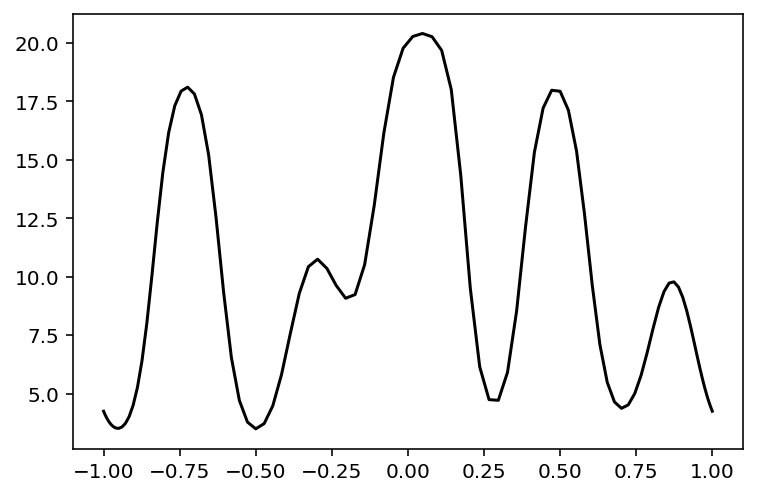

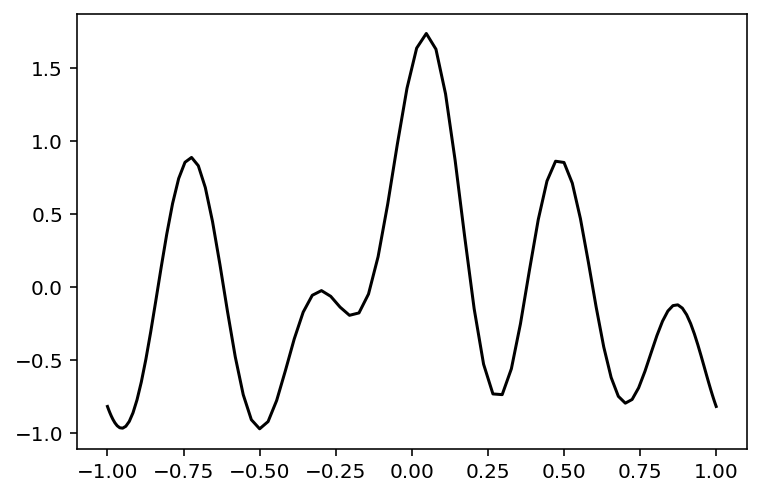

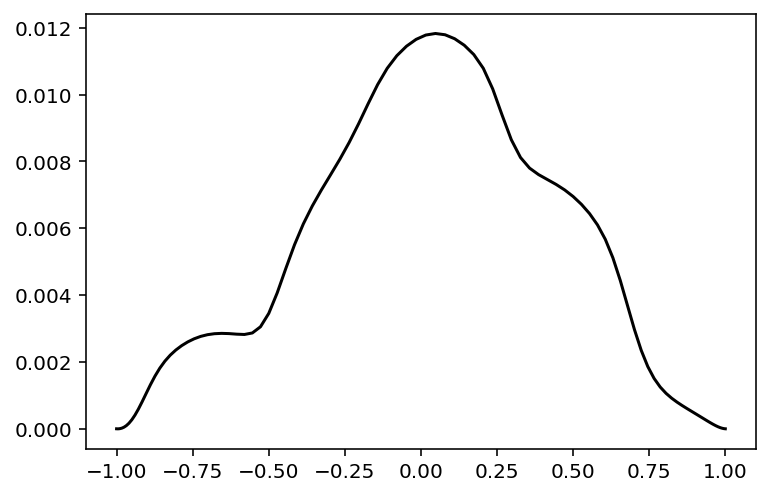

In [ ]:
sample = 0
plt.plot(x, data[0][sample, :, 0], color="black"); # weights
plt.figure()
plt.plot(x, data[0][sample, :, 1], color="black"); # rhs
plt.figure()
plt.plot(x, data[1][sample, :], color="black"); # solution

Checking residual on Chebyshev grid.

In [ ]:
sample = 0

D = utils.get_differentiation_matrix(N_points)
D2 = -jnp.dot(D, jnp.dot(jnp.diag(data[0][sample, :, 0]), D))[1:-1, 1:-1]

residual = jnp.linalg.norm(jnp.dot(D2, data[1][sample, :][1:-1]) - data[0][sample, :, 1][1:-1])
residual

DeviceArray(8.4339009e-13, dtype=float64)

Dataset in Chebyshev coefficients.

In [ ]:
N_points = 100
periodic = False

data = Elliptic.Fourier_series(5, N_points, 5, key=random.PRNGKey(13), generate_rhs=True, periodic=periodic, return_coefficients=True)
if periodic:
  x = jnp.hstack([utils.grid(N_points, periodic=True), 1])
else:
  x = utils.grid(N_points, periodic=False)

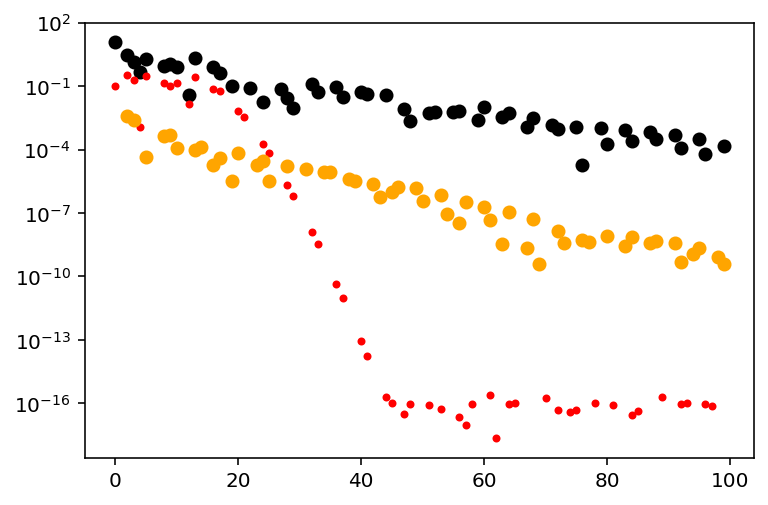

In [ ]:
plt.yscale("log")
plt.plot(data[0][0, :, 0], "o", color="black")
plt.plot(data[0][0, :, 1], ".", color="red")
plt.plot(data[1][0], "o", color="orange");

Dataset on the uniform grid.

In [ ]:
N_points = 100
periodic = True

data = Elliptic.Fourier_series(10, N_points, 5, key=random.PRNGKey(13), generate_rhs=True, periodic=periodic, return_coefficients=False)
if periodic:
  x = jnp.hstack([utils.grid(N_points-1, periodic=True), 1])
else:
  x = utils.grid(N_points, periodic=False)

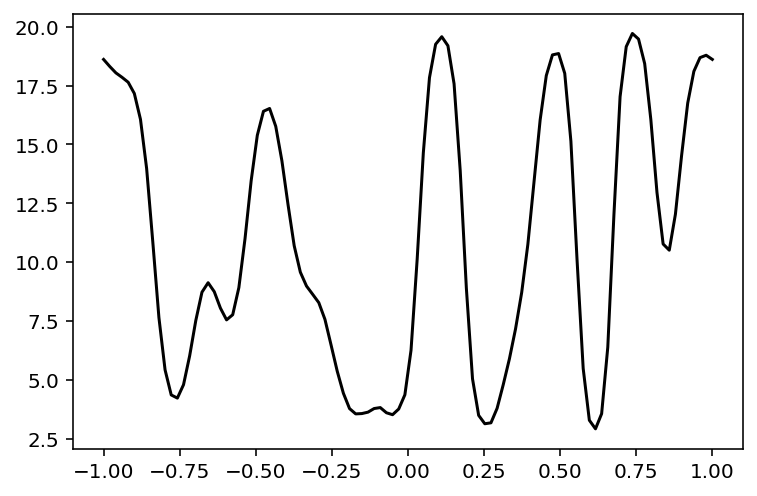

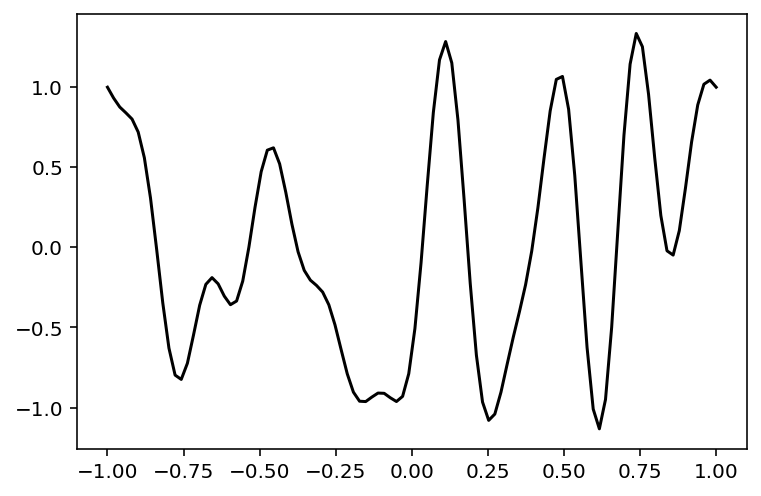

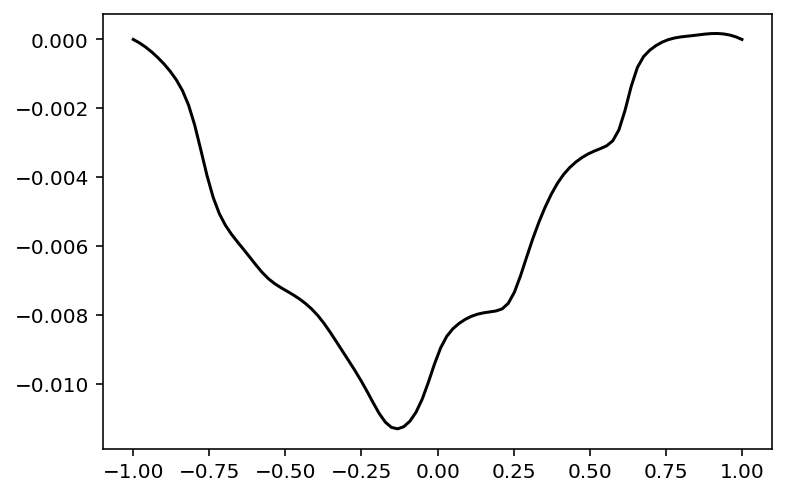

In [ ]:
sample = 0
plt.plot(x, data[0][sample, :, 0], color="black"); # weights
plt.figure()
plt.plot(x, data[0][sample, :, 1], color="black"); # rhs
plt.figure()
plt.plot(x, data[1][sample, :], color="black"); # solution

without rhs

In [ ]:
N_points = 100
periodic = True

data = Elliptic.Fourier_series(10, N_points, 5, key=random.PRNGKey(1729), sigma=2, periodic=True, return_coefficients=False)
if periodic:
  x = jnp.hstack([utils.grid(N_points-1, periodic=True), 1])
else:
  x = utils.grid(N_points, periodic=False)

In [ ]:
print(data[0].shape)
print(data[1].shape)

(5, 100)
(5, 100)


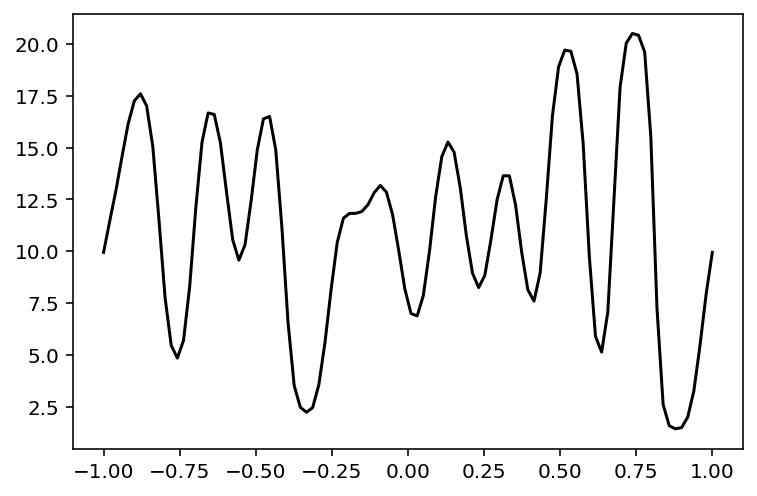

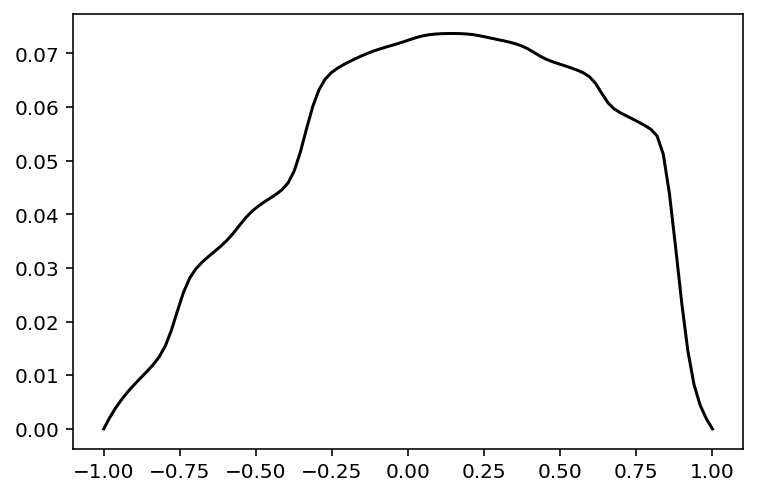

In [ ]:
sample = 4
plt.plot(x, data[0][sample, :], color="black"); # weights
plt.figure()
plt.plot(x, data[1][sample, :], color="black"); # solution

In [ ]:
N_points = 500
periodic = False

data = Elliptic.Fourier_series(5, N_points, 5, key=random.PRNGKey(13), generate_rhs=False, sigma=2, periodic=periodic, return_coefficients=True)
if periodic:
  x = jnp.hstack([utils.grid(N_points, periodic=True), 1])
else:
  x = utils.grid(N_points, periodic=False)

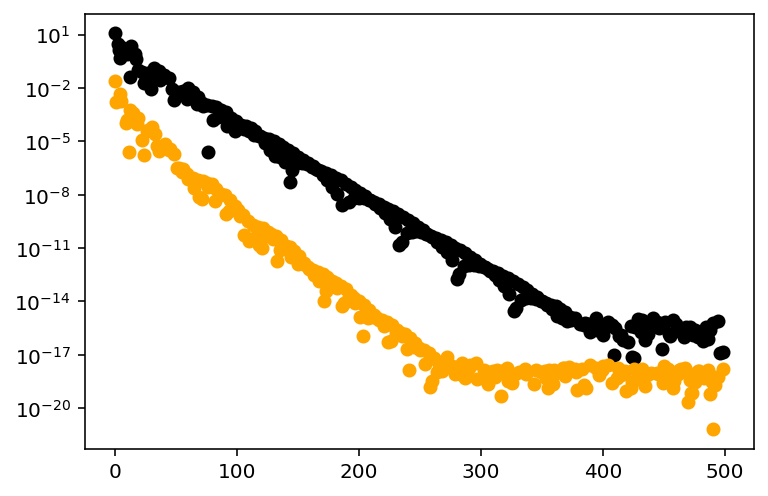

In [ ]:
plt.yscale("log")
plt.plot(data[0][0], "o", color="black")
plt.plot(data[1][0], "o", color="orange");

For the output, about $100\%$ of $L_2$ norm is coverd by first $100$ harmonics.

In [ ]:
low = jnp.linalg.norm(data[1][:, :100], axis=1)**2
high = jnp.linalg.norm(data[1][:, 100:], axis=1)**2

min(low / (low + high))

DeviceArray(1., dtype=float64)

For the input, about $99\%$ of $L_2$ norm is coverd by first $100$ harmonics.

In [ ]:
low = jnp.linalg.norm(data[0][:, :100], axis=1)**2
high = jnp.linalg.norm(data[0][:, 100:], axis=1)**2

min(low / (low + high))

DeviceArray(0.99999989, dtype=float64)

# 2D

For Chebyshev coefficients.

In [ ]:
N_points = 100
periodic = False
data = Elliptic.Fourier_series_2D(20, N_points, N_points, 2, key=random.PRNGKey(12), periodic=periodic, return_coefficients=True)
if periodic:
  x = jnp.hstack([utils.grid(N_points, periodic=True), 1])
else:
  x = utils.grid(N_points, periodic=False)

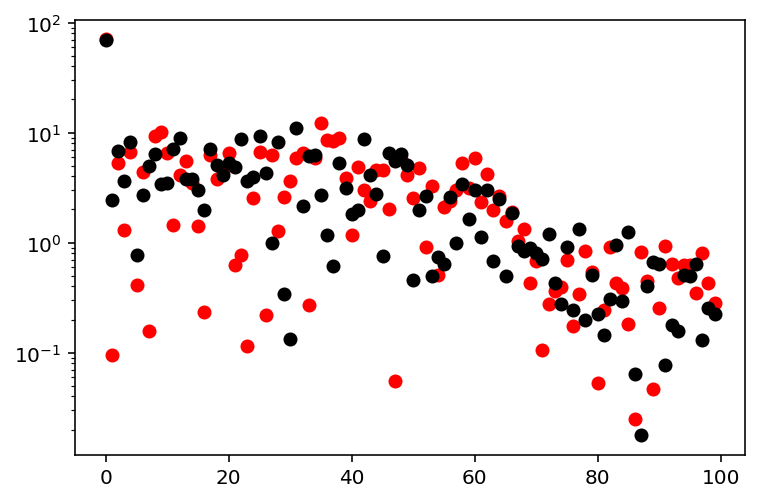

In [ ]:
plt.yscale("log")
plt.plot(jnp.sum(abs(data[0][0][:, :]), axis=1), "o", color="red")
plt.plot(jnp.sum(abs(data[0][0][:, :]), axis=0), "o", color="black");

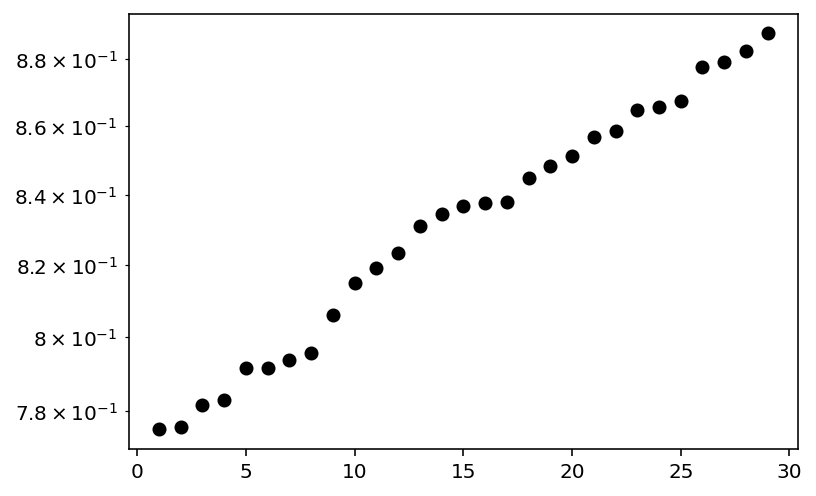

In [ ]:
norm = jnp.linalg.norm(data[0][0][:, :])
errors = [jnp.linalg.norm(data[0][0][:i, :i]) / norm for i in range(1, 30)]
plt.yscale("log")
plt.plot(range(1, 30), errors, "o", color="black");

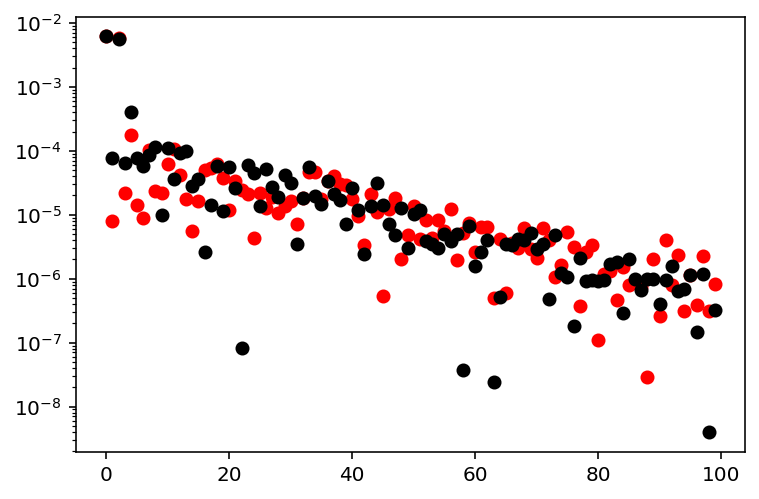

In [ ]:
plt.yscale("log")
plt.plot(abs(data[1][0][:, 0]), "o", color="red")
plt.plot(abs(data[1][0][0, :]), "o", color="black");

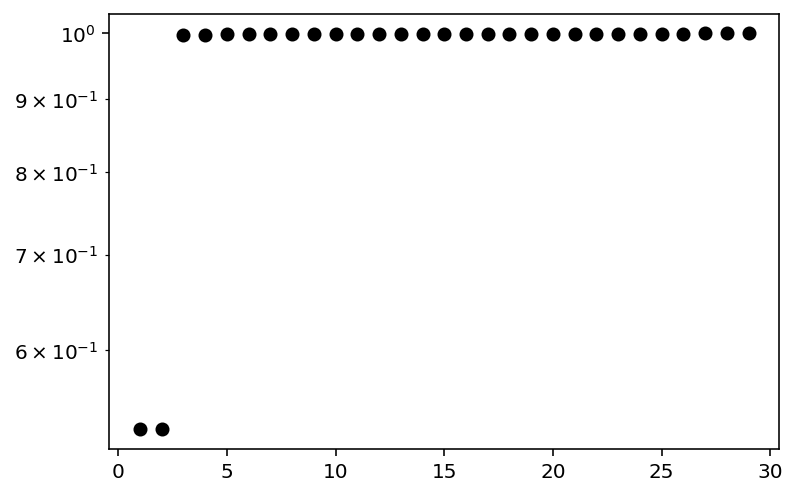

In [ ]:
norm = jnp.linalg.norm(data[1][0][:, :])
errors = [jnp.linalg.norm(data[1][0][:i, :i]) / norm for i in range(1, 30)]
plt.yscale("log")
plt.plot(range(1, 30), errors, "o", color="black");

In [ ]:
W = utils.get_interpolation_matrix(jnp.linspace(-1, 1, 100), 100)

In [ ]:
sol = jnp.transpose(Chebyshev.coefficients_to_values(jnp.transpose(data[1], axes=[1, 2, 0])), axes=[2, 0, 1])
sol = sol[1, :, :]
sol = jnp.dot(W, sol) / jnp.dot(W, jnp.ones_like(sol))
sol = jnp.dot(sol, W.T) / jnp.dot(jnp.ones_like(sol), W.T)

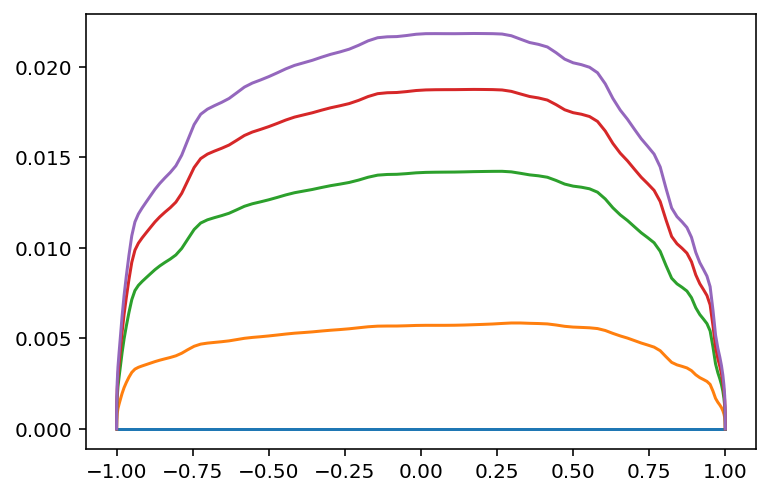

In [ ]:
for i in [0, 10, 20, 30, 40]:
  plt.plot(x, sol[:, i])

In physical space.

In [ ]:
N_points = 50
periodic = True
data = Elliptic.Fourier_series_2D(20, N_points, N_points, 2, key=random.PRNGKey(12), periodic=periodic, return_coefficients=False)
if periodic:
  x = jnp.hstack([utils.grid(N_points-1, periodic=True), 1])
else:
  x = utils.grid(N_points, periodic=False)

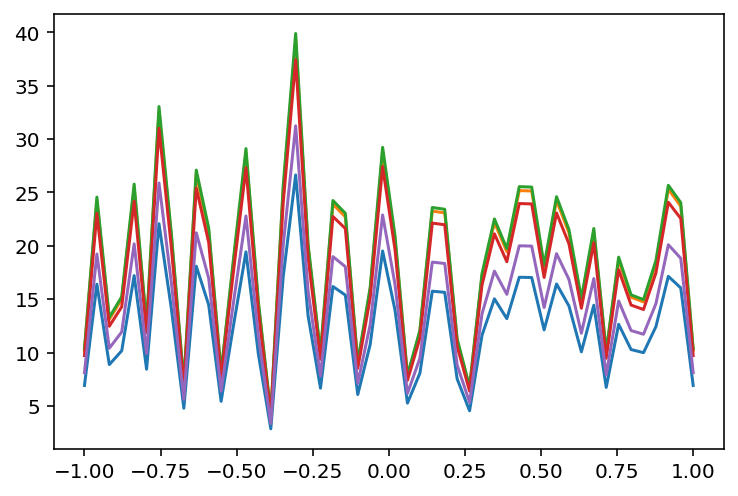

In [ ]:
for i in [0, 10, 20, 30, 40]:
  plt.plot(x, data[0][0][:, i])

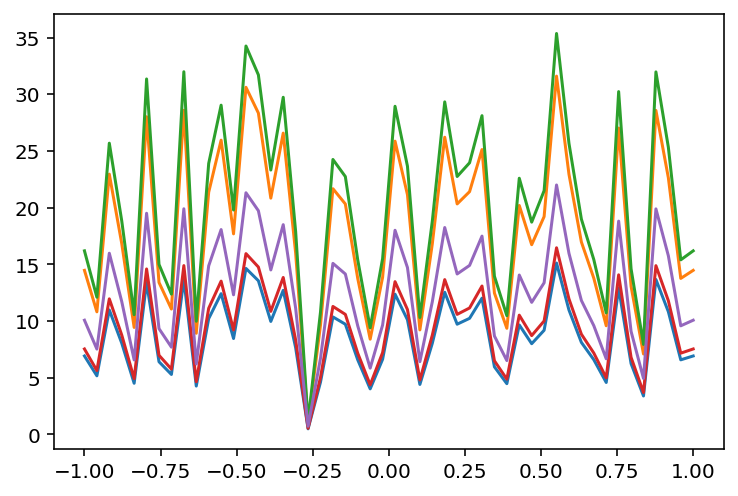

In [ ]:
for i in [0, 10, 20, 30, 40]:
  plt.plot(x, data[0][0][i, :])

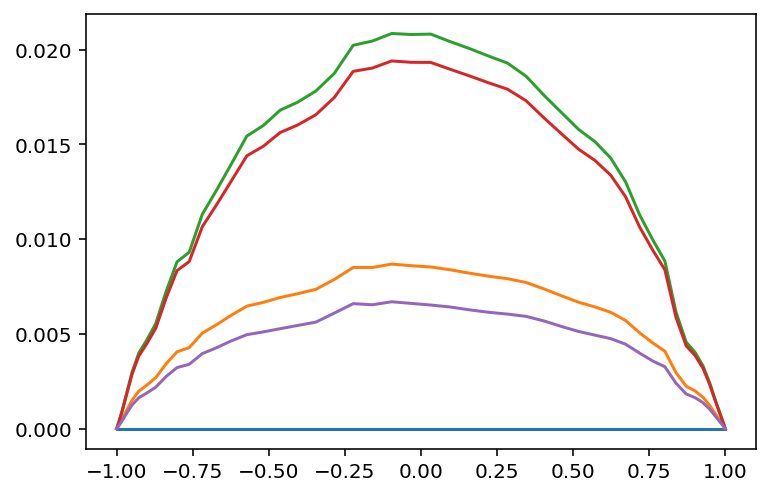

In [ ]:
for i in [0, 10, 20, 30, 40]:
  plt.plot(x, data[1][0][i, :])

Checking residual.

In [ ]:
N_points = 50
periodic = False
data = Elliptic.Fourier_series_2D(20, N_points, N_points, 2, key=random.PRNGKey(12), periodic=periodic, return_coefficients=False)
if periodic:
  x = jnp.hstack([utils.grid(N_points, periodic=True), 1])
else:
  x = utils.grid(N_points, periodic=False)

In [ ]:
W = utils.get_interpolation_matrix(jnp.hstack([utils.grid(99, periodic=True), 1]), N_points)

i = 1
weight = jnp.dot(W, data[0][i]) / jnp.dot(W, jnp.ones_like(data[0][i]))
weight = jnp.dot(weight, W.T) / jnp.dot(jnp.ones_like(weight), W.T)
sol = jnp.dot(W, data[1][i]) / jnp.dot(W, jnp.ones_like(data[1][i]))
sol = jnp.dot(sol, W.T) / jnp.dot(jnp.ones_like(sol), W.T)

In [ ]:
d = lambda input, axis: (jnp.roll(input, -1, axis=axis) - jnp.roll(input, 1, axis=axis))

h = 2 / (99)
res = (- d(weight*d(sol, 0), 0) - d(weight*d(sol, 1), 1)) / (4*h**2) - 1

jnp.linalg.norm(res[3:-3, 3:-3]) / (94**2)

DeviceArray(0.03244179, dtype=float64)